In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df8 = pd.read_csv("../data/key_comp_16.csv")
df8

,comps,size
0,8706,1000
1,13979,1500
2,19458,2000
3,25111,2500
4,30900,3000
...,...,...
193,1494200,97500
194,1502773,98000
195,1511161,98500
196,1519567,99000


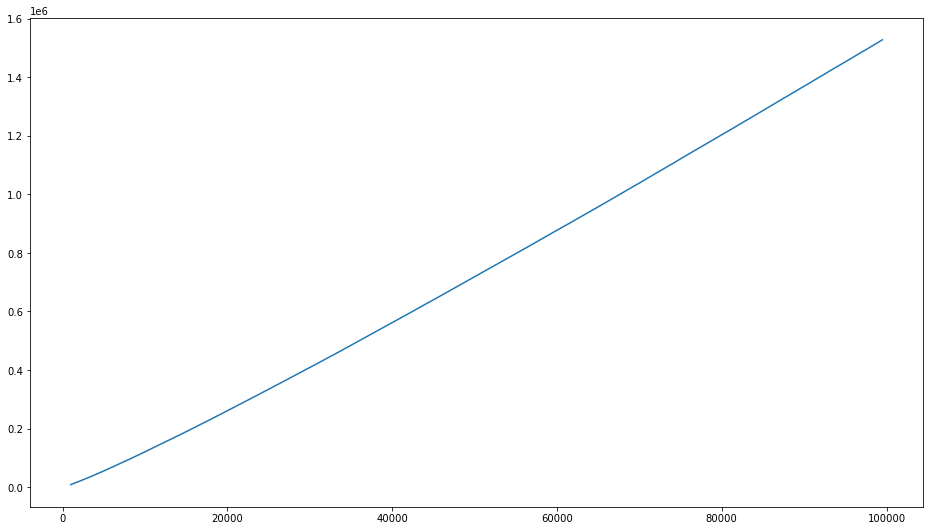

In [3]:
f = plt.figure(figsize=(16, 9))
plt.plot(df8['size'], df8['comps'])

In [4]:
df16 = pd.read_csv('../data/val_S_16.csv')
df16

,time,size
0,464,1000
1,716,1500
2,946,2000
3,1203,2500
4,1456,3000
...,...,...
193,56886,97500
194,57305,98000
195,57537,98500
196,58077,99000


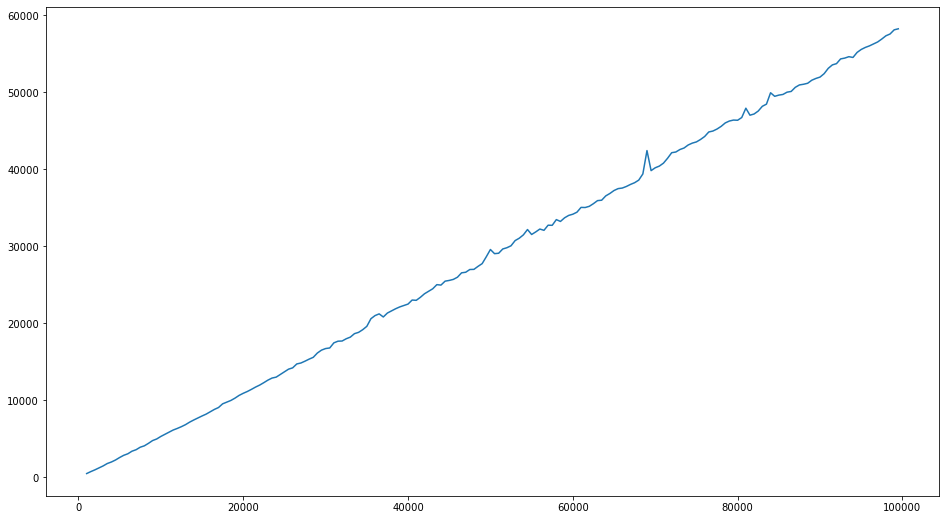

In [5]:
f = plt.figure(figsize=(16, 9))
plt.plot(df16['size'], df16['time'])

In [9]:
df_e5 = pd.read_csv("../data/optimal_S_1e5.csv")
df_e5

,time,S
0,59449,4
1,59241,8
2,59285,12
3,59449,16
4,59185,20
...,...,...
122,58088,492
123,58043,496
124,58040,500
125,58005,504


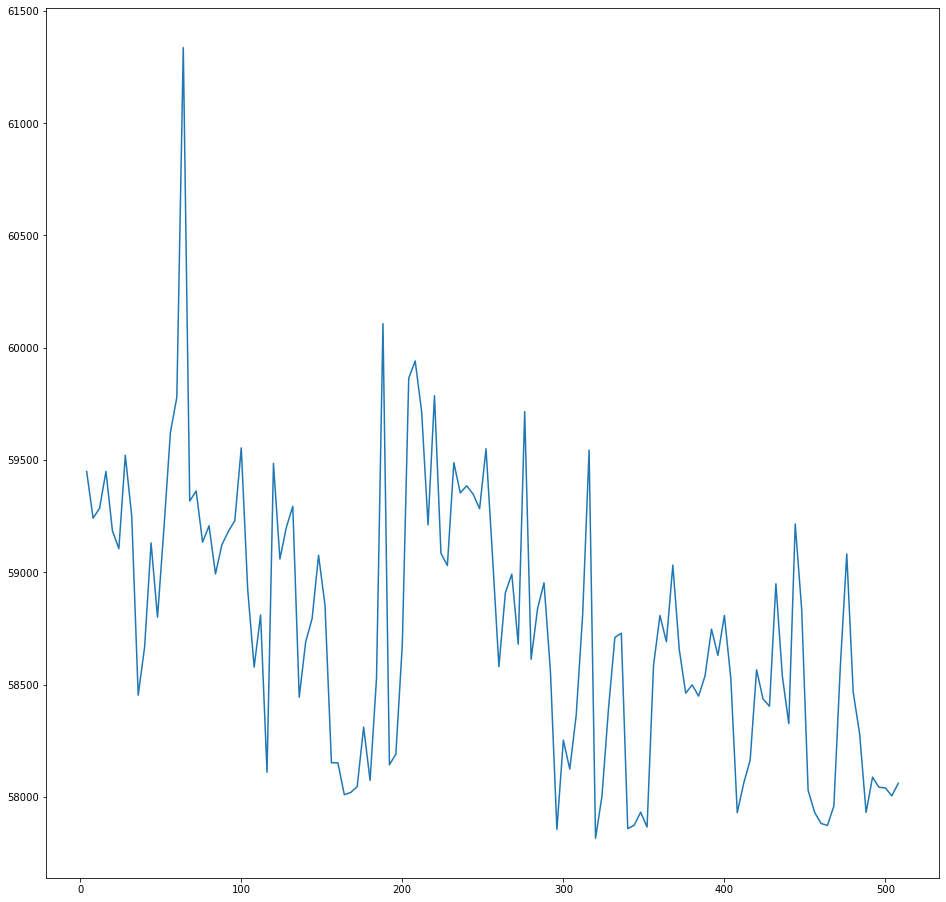

In [10]:
f = plt.figure(figsize=(16, 16))
plt.plot(df_e5['S'], df_e5['time'])